# Pandas的SettingWithCopyWarning报警复现、原因、解决方案

In [13]:
import pandas as pd

In [14]:
file_path = './data/beijing_tianqi/beijing_tianqi_2018.csv'
df = pd.read_csv(file_path)

In [15]:
df.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
0,2018-01-01,3℃,-6℃,晴~多云,东北风,1-2级,59,良,2
1,2018-01-02,2℃,-5℃,阴~多云,东北风,1-2级,49,优,1
2,2018-01-03,2℃,-5℃,多云,北风,1-2级,28,优,1
3,2018-01-04,0℃,-8℃,阴,东北风,1-2级,28,优,1
4,2018-01-05,3℃,-6℃,多云~晴,西北风,1-2级,50,优,1


In [16]:
df.loc[:, 'bWendu'] = df['bWendu'].str.replace('℃', '').astype('int32')
df.loc[:, 'yWendu'] = df['yWendu'].str.replace('℃', '').astype('int32')

In [17]:
df.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
0,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2
1,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1
2,2018-01-03,2,-5,多云,北风,1-2级,28,优,1
3,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1
4,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1


## 复现

In [6]:
# 只选出三月份的数据进行分析
condition = df['ymd'].str.startswith('2018-03')

In [7]:
# 设置温差 这时候会发生错误：SettingWithCopyWarning
df[condition]['wen_cha'] = df['bWendu'] - df['yWendu']

C:\Users\20866\AppData\Local\Temp\ipykernel_4736\2779707975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[condition]['wen_cha'] = df['bWendu'] - df['yWendu']


In [8]:
# 查看是否修改成功
df[condition].head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
59,2018-03-01,8,-3,多云,西南风,1-2级,46,优,1
60,2018-03-02,9,-1,晴~多云,北风,1-2级,95,良,2
61,2018-03-03,13,3,多云~阴,北风,1-2级,214,重度污染,5
62,2018-03-04,7,-2,阴~多云,东南风,1-2级,144,轻度污染,3
63,2018-03-05,8,-3,晴,南风,1-2级,94,良,2


## 原因
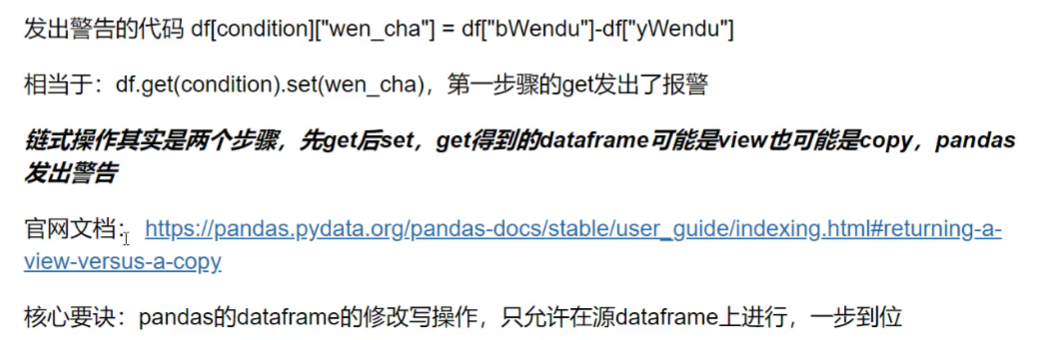

## 解决方法1
将get+set的两步操作，改成set的一步操作

In [9]:
df.loc[condition, 'wen_cha'] = df['bWendu'] - df['yWendu']

In [10]:
df[condition].head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel,wen_cha
59,2018-03-01,8,-3,多云,西南风,1-2级,46,优,1,11
60,2018-03-02,9,-1,晴~多云,北风,1-2级,95,良,2,10
61,2018-03-03,13,3,多云~阴,北风,1-2级,214,重度污染,5,10
62,2018-03-04,7,-2,阴~多云,东南风,1-2级,144,轻度污染,3,9
63,2018-03-05,8,-3,晴,南风,1-2级,94,良,2,11


## 解决方法2
如果需要筛选数据做后续的处理分析，使用copy赋值DataFrame

In [18]:
df_month3 = df[condition].copy()

In [19]:
df_month3.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
59,2018-03-01,8,-3,多云,西南风,1-2级,46,优,1
60,2018-03-02,9,-1,晴~多云,北风,1-2级,95,良,2
61,2018-03-03,13,3,多云~阴,北风,1-2级,214,重度污染,5
62,2018-03-04,7,-2,阴~多云,东南风,1-2级,144,轻度污染,3
63,2018-03-05,8,-3,晴,南风,1-2级,94,良,2


In [20]:
df_month3['wen_cha'] = df['bWendu'] - df['yWendu']

In [21]:
df_month3.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel,wen_cha
59,2018-03-01,8,-3,多云,西南风,1-2级,46,优,1,11
60,2018-03-02,9,-1,晴~多云,北风,1-2级,95,良,2,10
61,2018-03-03,13,3,多云~阴,北风,1-2级,214,重度污染,5,10
62,2018-03-04,7,-2,阴~多云,东南风,1-2级,144,轻度污染,3,9
63,2018-03-05,8,-3,晴,南风,1-2级,94,良,2,11


**总而言之，pandas不允许先筛选DataFrame，再进行修改写入**  
要么使用.loc实现一个步骤直接修改源DataFrame  
要么先复制一个子DataFrame再一个步骤执行修改

--------

下面是测试re正则

In [22]:
import re

text = """root-ad13main-c4ompu423416ter science-aad234main"""

data_list = re.findall(r"\d+", text)  # + 代表1个或者n个
print(data_list)

['13', '4', '423416', '234']


In [23]:
import re

text = """root-ad13main-c4ompu423416ter science-aad234main"""

data_list = re.findall(r"\d*", text)  # * 代表0个或者n个
print(data_list)  # 

['', '', '', '', '', '', '', '13', '', '', '', '', '', '', '4', '', '', '', '', '423416', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '234', '', '', '', '', '']


In [26]:
import re

text = """root-ad13main-c4ompu423416ter science-aad234main"""

data_list = re.findall(r"\d?", text)  # ? 代表0个或者1个  意思是只拿0个或1个(不管后面本来有多少个)
print(data_list)

['', '', '', '', '', '', '', '1', '3', '', '', '', '', '', '', '4', '', '', '', '', '4', '2', '3', '4', '1', '6', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '2', '3', '4', '', '', '', '', '']


In [30]:
import re

text = """root-ad13main-c4ompu423416ter science-aad234main"""

data_list = re.findall(r"\d{2}", text)  # {n} 固定n个
print(data_list)

['13', '42', '34', '16', '23']


In [31]:
import re

text = """root-ad13main-c4ompu423416ter science-aad234main"""

data_list = re.findall(r"\d{2,}", text)  # {n,} 固定n个,或者比n个更多
print(data_list)

['13', '423416', '234']


In [33]:
import re

text = """你好巴拉巴拉 biubiubiu computer science good morning longArc架构 计算机科学与技术 华为牛逼 
打倒美帝国主义纸老虎 日本鬼子不得好死 祝没有真心反对日本核污水拍害的日本人全都收到核辐射而死 hahaha 耶 2024年3月10日"""

data_list = re.findall("计算机\w+技术", text)  # 尽可能多的去匹配  -- 贪婪匹配 默认是贪婪的
print(data_list)  # ['计算机科学与技术']

['计算机科学与技术']


In [34]:
# 字符串的split
text = "dsadfeferfg.mp4"
text.split(".")

['dsadfeferfg', 'mp4']

In [35]:
import re

text = "大小逗2B最逗3B欢乐"
data_list = re.split("\dB", text)
print(data_list)  # ['大小逗', '最逗', '欢乐']

['大小逗', '最逗', '欢乐']
